## Housing Price Prediction
### Objectives

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

### Business Goal

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. 

In [982]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score



import statsmodels.api as sm


from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore")

##  Reading and Understanding the Data


In [983]:
housing = pd.read_csv("train.csv")
housing .head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [984]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset has 1460 records and 81 columns.

In [985]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


##   Exploratory Data Analysis

Columns with Null Values


In [986]:
housing.columns[housing.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Features specific to basement and garage have Null values which indicates there is not basement/garage in that house. 
Replacing Null with approriate values(NoBsmt/NoG) indicating lack of basement/garage.

In [987]:
basementFeatures = [ 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basementFeatures:
    housing[col].fillna('NoBsmt',inplace=True)

In [988]:
garageFeatures = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garageFeatures:
    housing[col].fillna("NoGar", inplace=True)

In [989]:
housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NoGar       81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Similar to above freatures replacing Null values in FireplaceQu and MasVnrType with approriate values.

In [990]:
housing['FireplaceQu'].fillna('NoFP',inplace=True)                  

In [991]:
housing['MasVnrType'].fillna('None',inplace=True)        

In [992]:
# Remaining columns with missing values

housing.columns[housing.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrArea', 'Electrical', 'GarageYrBlt',
       'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [993]:
housing[['LotFrontage', 'Alley', 'MasVnrArea', 'Electrical'
         , 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   Alley        91 non-null     object 
 2   MasVnrArea   1452 non-null   float64
 3   Electrical   1459 non-null   object 
 4   GarageYrBlt  1379 non-null   float64
 5   PoolQC       7 non-null      object 
 6   Fence        281 non-null    object 
 7   MiscFeature  54 non-null     object 
dtypes: float64(3), object(5)
memory usage: 91.4+ KB


In [994]:
# Remove the Columns with mostly Null values.
housing.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],inplace=True)


In [995]:
housing.columns[housing.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [996]:
housing[['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   Electrical   1459 non-null   object 
 3   GarageYrBlt  1379 non-null   float64
dtypes: float64(3), object(1)
memory usage: 45.8+ KB


In [997]:
#Imputing `LotFrontage`,`MasVnrArea`,`GarageYrBlt` with  mean values 

housing['LotFrontage'].fillna(housing['LotFrontage'].mean(),inplace=True) 
housing['MasVnrArea'].fillna(housing['MasVnrArea'].mean(),inplace=True)   
housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mean(),inplace=True) 

In [998]:
#Since only a sungle record has missing value for Electrical, dropping one row with the missing value.
housing.dropna(axis= 0, subset=['Electrical'], inplace =True)
housing.columns[housing.isnull().any()]

Index([], dtype='object')

No missing values present in the dataset anymore

In [999]:
# Dropping ID column as it is not useful for model building
housing.drop('Id', axis =1 , inplace=True)

In [1000]:
#Dataset after initial preperation
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [1001]:
#Seperating numerical and categorical vars for analysis

housingNumVars = housing.select_dtypes(include =['int64','float64'])

housingCatVars = housing.select_dtypes(include=['object'])


In [1002]:
# Numerical variables
print(housingNumVars.columns)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [1003]:
#Categorical variables
print(housingCatVars.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


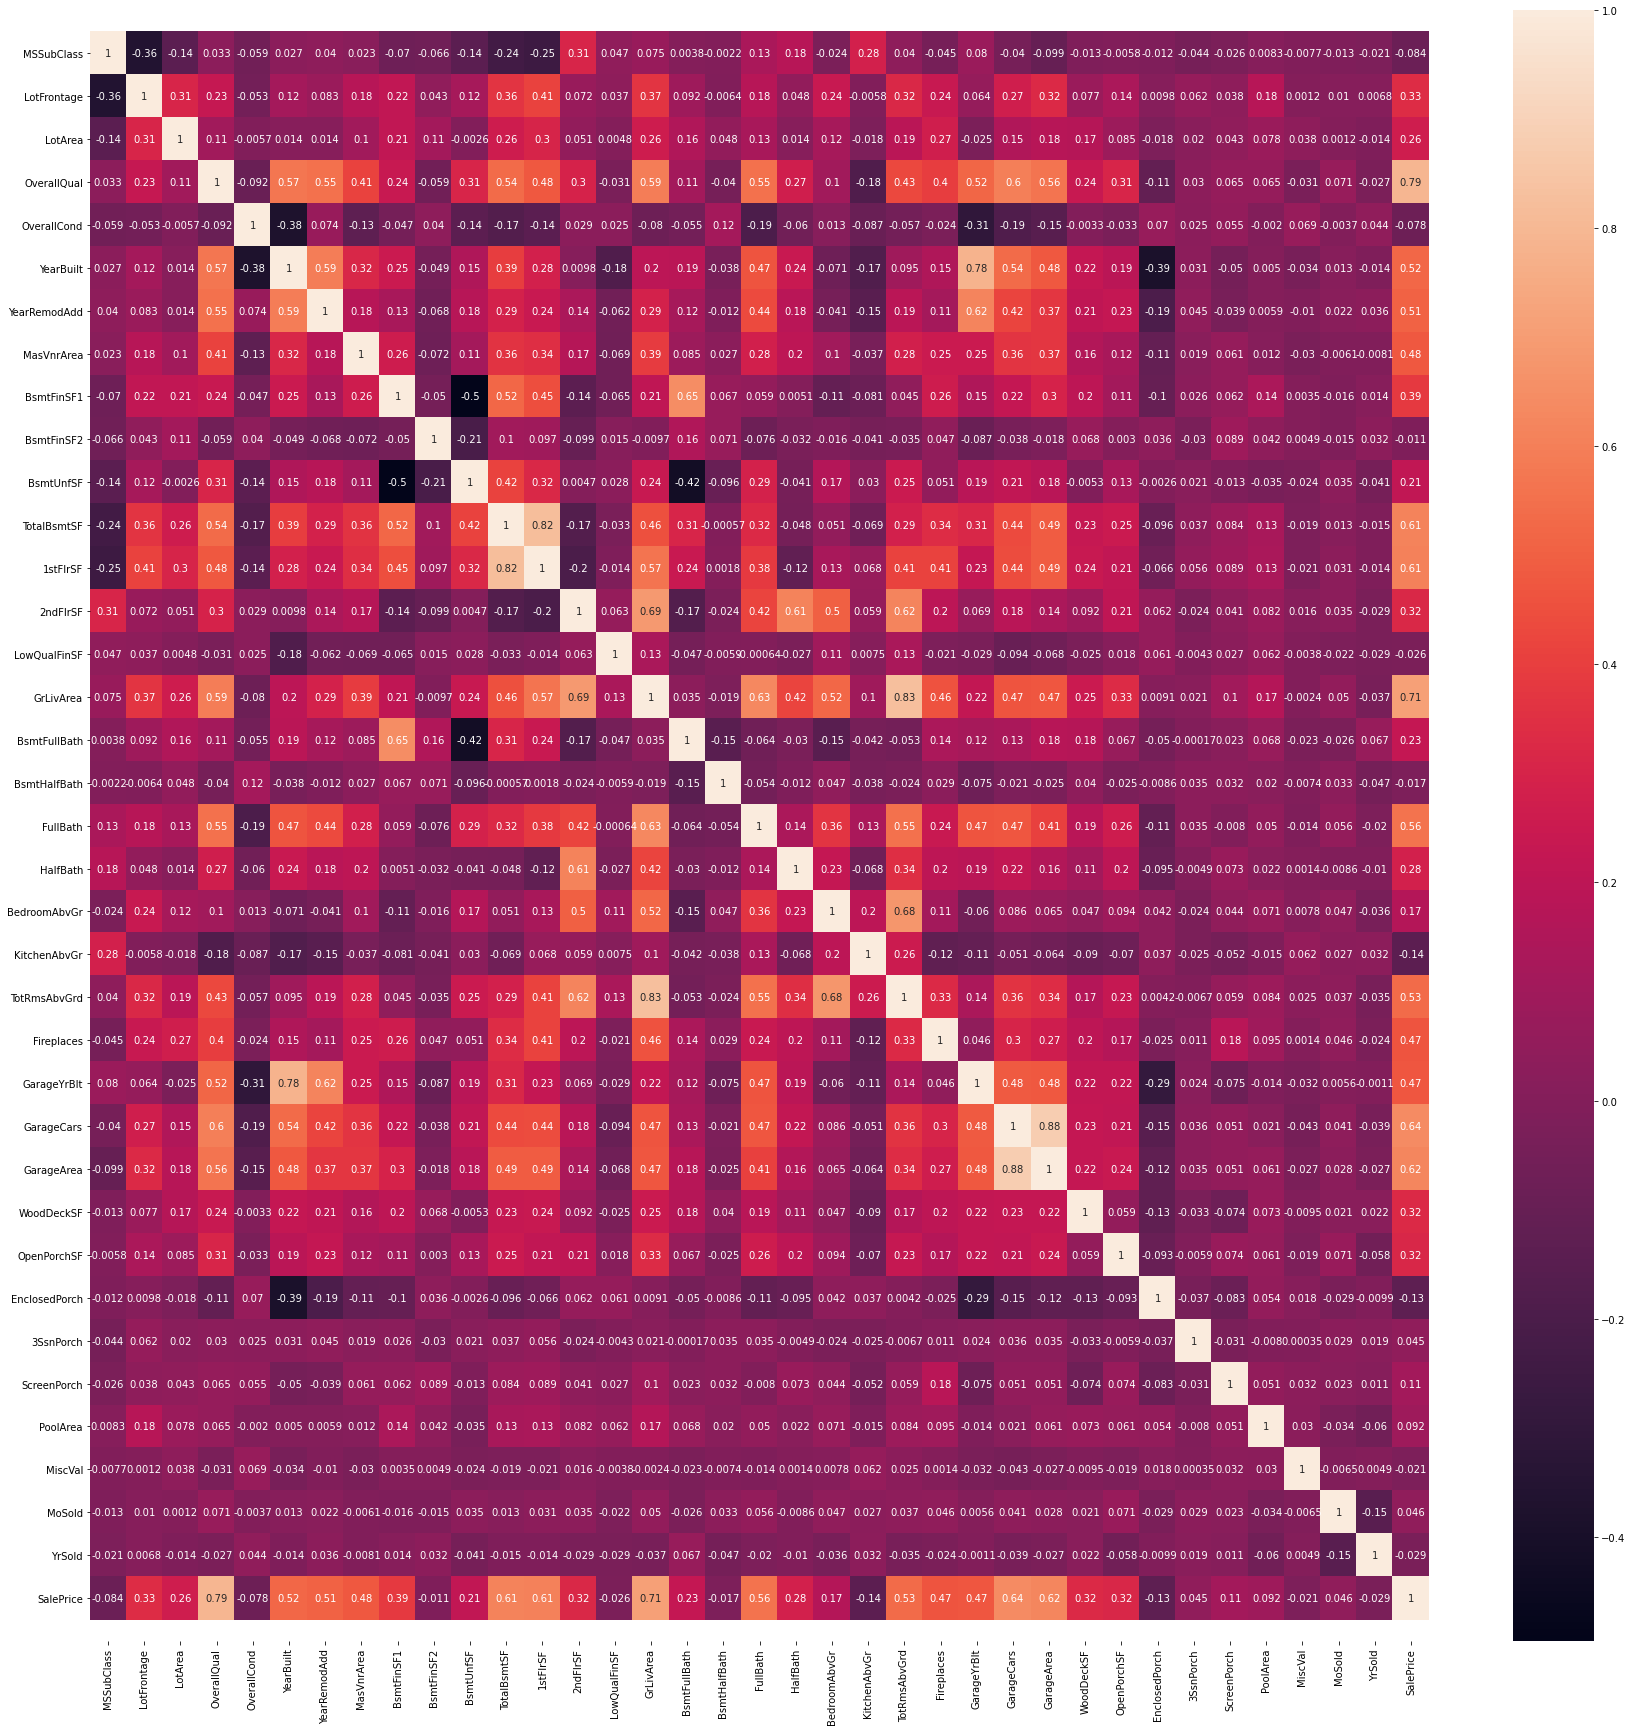

In [1004]:
# Checking correlations among various features
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(housingNumVars.corr(), 
            xticklabels=housingNumVars.corr().columns.values,
            yticklabels=housingNumVars.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

 From the above heatmap, we have the following features which show high correlation among them
 
 GarageCars and GarageArea -0.88
 
 TotalrmsAbvGnd and GLivArea - 0.83
 
 TotalBsmtSF and 1stFrSF - 0.82
 
 YrBlt and GarYrBlt - 0.78



Visualizing effect of Numerical variables on Sale Price

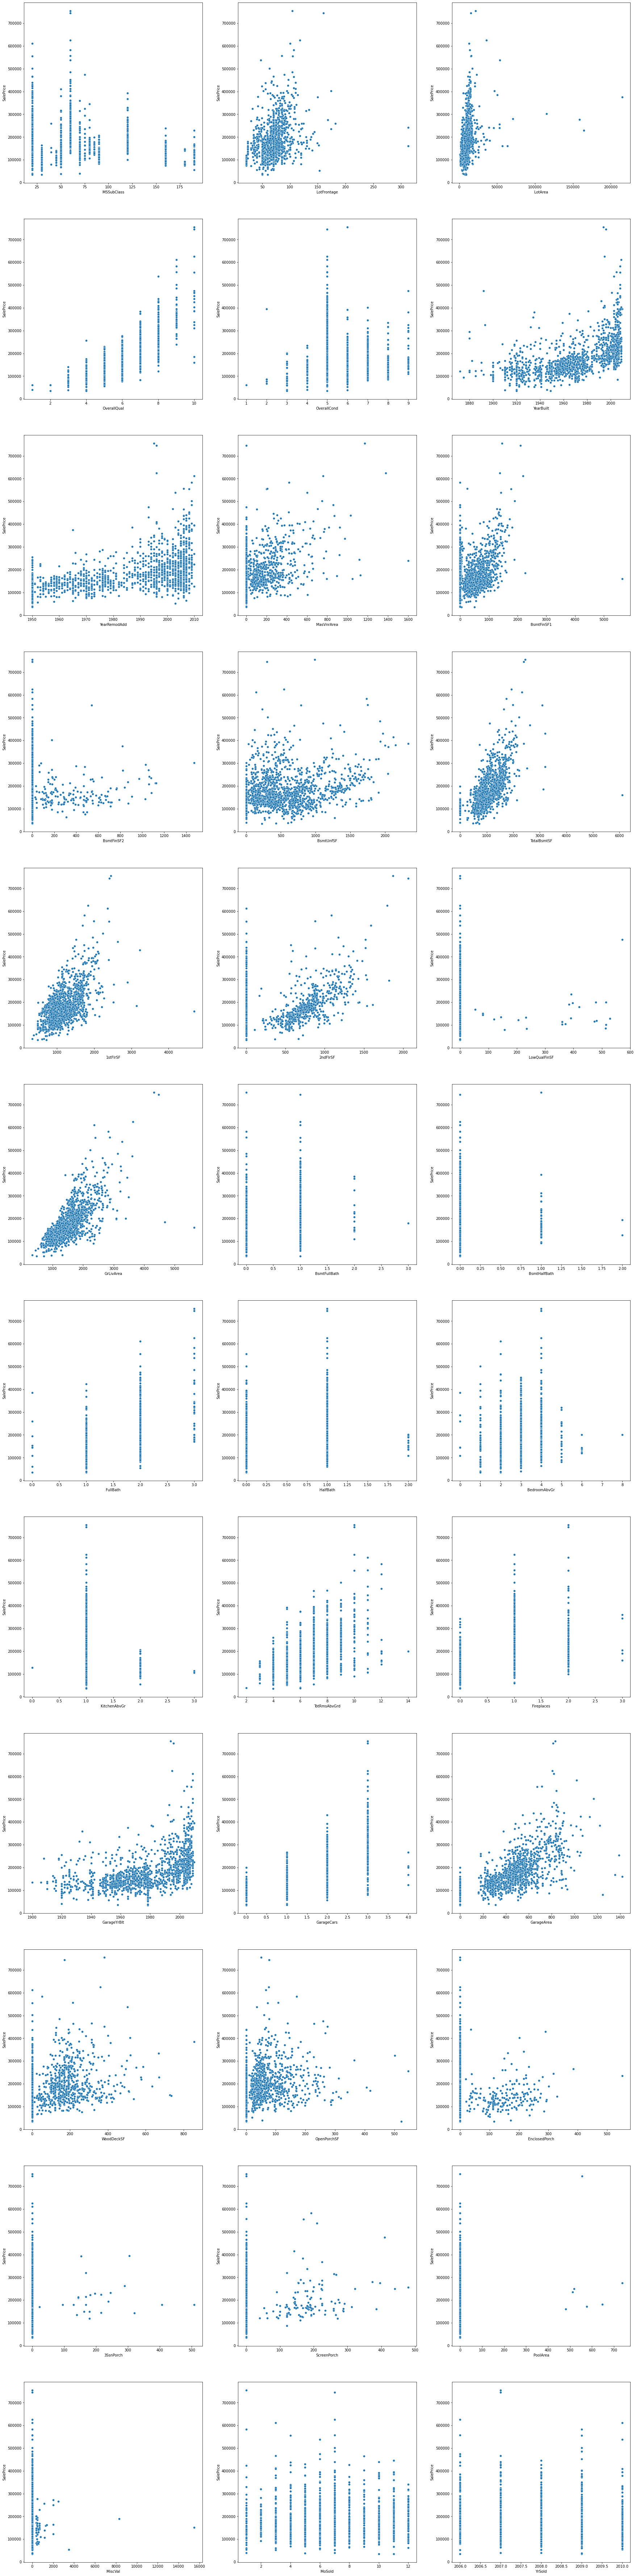

In [1005]:
plt.figure(figsize=(30,130))

numVars = housingNumVars.columns
for i in range(1,37):
    plt.subplot(12,3,i)
    sns.scatterplot(x=numVars[i-1], y='SalePrice', data=housing)

Visualizing effect of Categorical variables on Sale Price

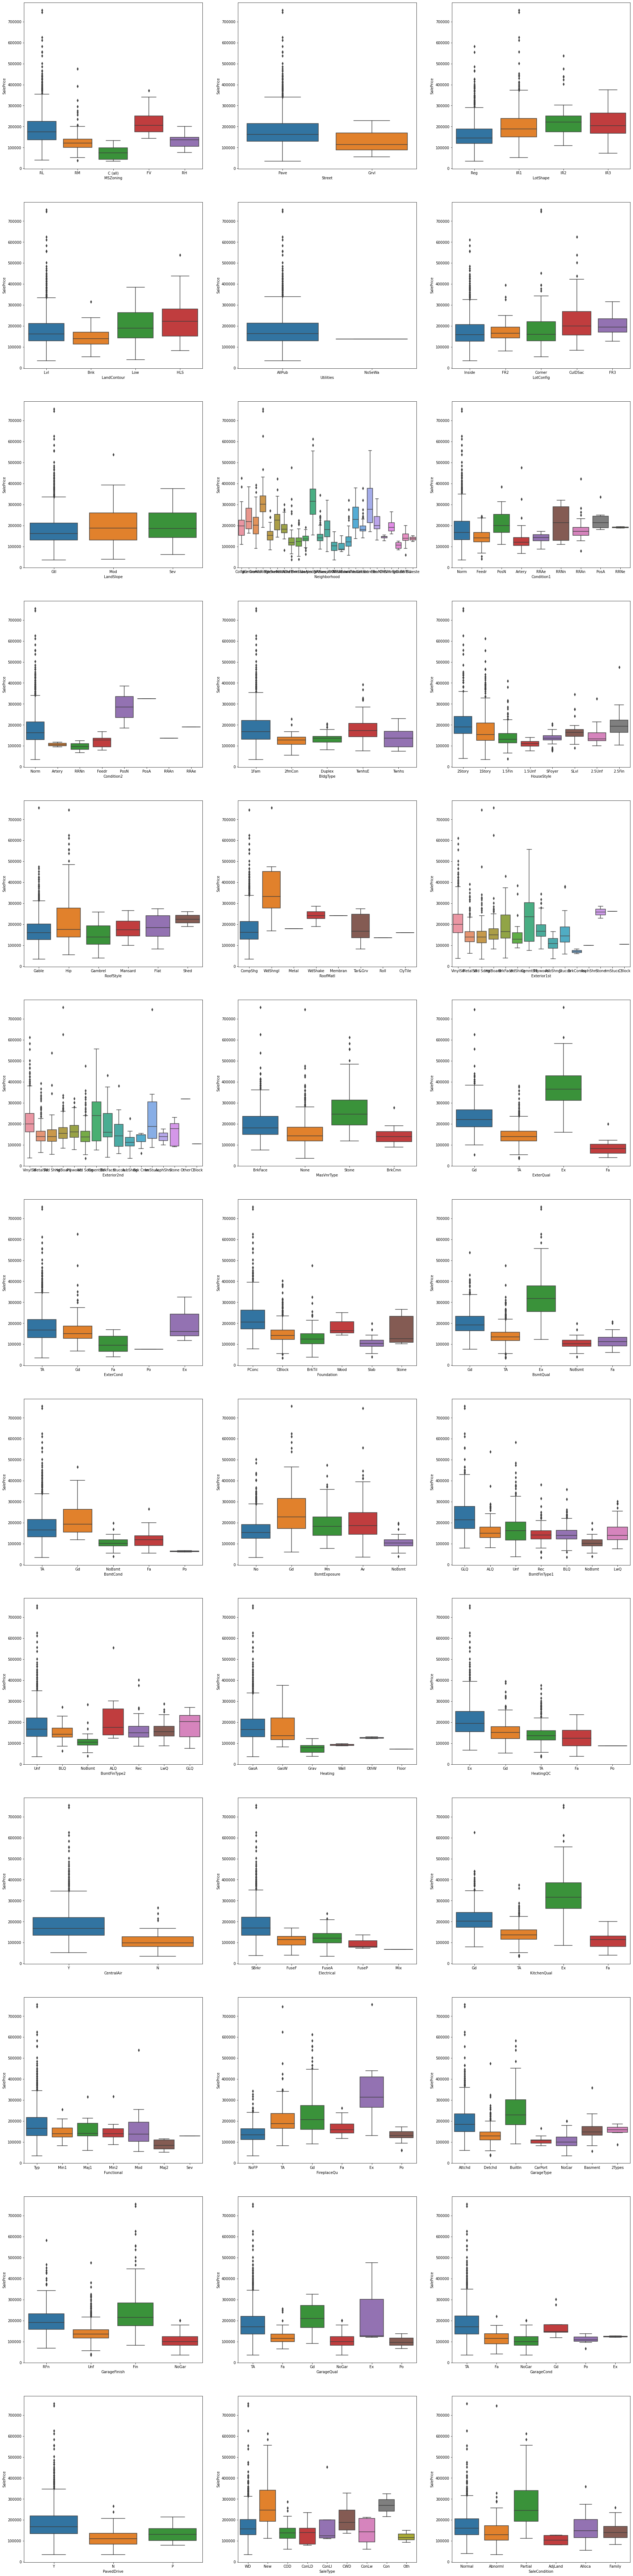

In [1006]:
plt.figure(figsize=(30,130))

catVars = housingCatVars.columns
for i in range(1,40):
    plt.subplot(13,3,i)
    sns.boxplot(x=catVars[i-1], y='SalePrice', data=housing)

In [1007]:
# Creating Dummy variables for the categorical features
housing_dummies = pd.get_dummies(housingCatVars, drop_first=True)
housing_dummies


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1008]:
#Dropping the original categorical columns from the dataframe
housing.drop(list(housingCatVars.columns), axis=1, inplace=True)
housing.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [1009]:
# concatinating the dummy variable dataset with the original dataset
housing = pd.concat([housing, housing_dummies] , axis=1)

housing.shape

(1459, 247)

##  Splitting the dataset into Train Test sets

In [1010]:
housing_train, housing_test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)

In [1011]:
housing_train.shape

(1021, 247)

In [1012]:
housing_test.shape

(438, 247)

In [1013]:
# Create X and y
y_train = housing_train.pop('SalePrice')
X_train = housing_train

y_test = housing_test.pop('SalePrice')
X_test = housing_test


In [1014]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,90,75.0,10125,5,5,1977,1977,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1416,190,60.0,11340,4,6,1885,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
390,50,50.0,8405,5,8,1900,1950,0.0,241,391,...,0,0,0,0,1,0,0,0,1,0
877,60,74.0,8834,9,5,2004,2005,216.0,1170,0,...,0,0,0,0,1,0,0,0,1,0
567,20,70.0,10171,7,5,2004,2004,168.0,2,0,...,0,0,0,0,1,0,0,0,1,0


In [1015]:
y_train.head()

984     126000
1416    122500
390     119000
877     350000
567     214000
Name: SalePrice, dtype: int64

### Scaling the columns

In [1016]:
NumCols = list(X_train.select_dtypes(include =['int64','float64']).columns)
len(NumCols)

36

In [1017]:
X_train[NumCols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
984,90,75.0,10125,5,5,1977,1977,0.0,0,0,...,539,0,0,0,0,0,0,0,8,2009
1416,190,60.0,11340,4,6,1885,1950,0.0,0,0,...,560,0,0,114,0,0,0,0,4,2010
390,50,50.0,8405,5,8,1900,1950,0.0,241,391,...,384,0,130,112,0,0,0,0,4,2008
877,60,74.0,8834,9,5,2004,2005,216.0,1170,0,...,738,184,0,0,0,0,0,0,6,2009
567,20,70.0,10171,7,5,2004,2004,168.0,2,0,...,532,0,0,0,0,0,0,0,3,2010


In [1018]:
#using standard scaler for scaling the numerical features
scaler = StandardScaler()

X_train[NumCols] = scaler.fit_transform(X_train[NumCols])


In [1019]:
X_train[NumCols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
984,0.787494,0.214847,-0.049244,-0.790233,-0.512364,0.195445,-0.352223,-0.560241,-0.931228,-0.299629,...,0.302095,-0.729730,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,0.633710,0.890540
1416,3.177599,-0.470784,0.067048,-1.500469,0.384932,-2.818107,-1.638960,-0.560241,-0.931228,-0.299629,...,0.399400,-0.729730,-0.702191,1.435413,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,1.638888
390,-0.168548,-0.927871,-0.213872,-0.790233,2.179524,-2.326767,-1.638960,-0.560241,-0.422211,1.997881,...,-0.416110,-0.729730,1.144341,1.403785,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,0.142193
877,0.070462,0.169138,-0.172811,2.050710,-0.512364,1.079857,0.982172,0.588549,1.539931,-0.299629,...,1.224177,0.708584,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.098625,0.890540
567,-0.885580,-0.013697,-0.044841,0.630239,-0.512364,1.079857,0.934515,0.333263,-0.927003,-0.299629,...,0.269660,-0.729730,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-1.197128,1.638888


In [1020]:
# Scaling the test subset
X_test[NumCols] = scaler.transform(X_test[NumCols])

In [1021]:
X_test[NumCols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
789,0.070462,-0.011413,0.149840,-0.079997,2.179524,-0.164871,1.077486,0.274759,0.268446,-0.299629,...,-0.138095,0.309921,1.684096,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,0.267543,-0.606154
425,0.070462,-0.470784,-0.695025,0.630239,2.179524,-0.819991,0.362632,-0.560241,-0.931228,-0.299629,...,-1.083345,-0.729730,-0.702191,1.625176,-0.121132,-0.273,-0.054189,-0.077724,0.999878,0.890540
204,-0.168548,-0.927871,-0.683348,-0.790233,1.282228,-0.787235,-1.638960,-0.560241,-0.272252,-0.299629,...,-1.083345,-0.729730,-0.205048,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,0.890540
118,0.070462,0.900477,0.166207,0.630239,-0.512364,0.621273,0.267318,-0.560241,2.173561,-0.299629,...,0.556942,2.139081,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.464793,1.638888
244,0.070462,-0.011413,-0.168408,0.630239,-0.512364,0.752297,0.839201,-0.560241,0.536683,-0.299629,...,-0.050057,-0.729730,1.144341,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.464793,1.638888


## Model Building

### Linear Regression

In [1022]:
# Building Linear Regression model
linreg = LinearRegression()
from sklearn.feature_selection import RFE
rfe = RFE(linreg, 50)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

[False False False False False False False False False False False False
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True  True False False False  True
 False False  True False False False False False False False False False
 False  True False False False False  True False False False False False
 False False False False False False False  True  True False  True False
 False False False False  True  True  True  True Fa

In [1023]:
# Looking at the 50 variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'Neighborhood_NoRidge', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NoBsmt', 'BsmtQual_TA',
       'BsmtCond_NoBsmt', 'BsmtExposure_NoBsmt', 'BsmtFinType1_NoBsmt',
       'Heating_OthW', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Sev', 'GarageType_NoGar', 'GarageFinish_NoGar',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_NoGar', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NoGar',
       'GarageCond_Po', 'GarageCond_TA', 'SaleType_Con', 'SaleType_New',
       'Sal

In [1024]:
# Reducing the dataset to 50 selected features after RFE
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

X_train_rfe.head()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Neighborhood_NoRidge,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,RoofMatl_CompShg,...,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGar,GarageCond_Po,GarageCond_TA,SaleType_Con,SaleType_New,SaleCondition_Partial
984,0.320038,0.206085,-0.123208,0.399579,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1416,0.179679,1.610886,-0.123208,1.449374,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
390,-0.534650,0.146404,-0.123208,-0.293361,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
877,0.721065,0.963575,-0.123208,1.324758,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
567,0.904033,-0.785539,-0.123208,0.023843,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [1025]:

# 1. Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# 2. Create model
lr = sm.OLS(y_train,X_train_lm)

# 3. Fit the model
lm = lr.fit()

# 4. View the parameters
lm.params

const                   -1.511391e+05
1stFlrSF                 2.114636e+04
2ndFlrSF                 7.667087e+03
LowQualFinSF            -2.935477e+03
GrLivArea                2.197376e+04
Neighborhood_NoRidge     6.400148e+04
Condition2_PosA          1.667991e+04
Condition2_PosN         -1.993515e+05
Condition2_RRAe         -2.864297e-09
Condition2_RRAn         -8.380732e-09
RoofMatl_CompShg         5.315566e+05
RoofMatl_Membran         5.986186e+05
RoofMatl_Metal           5.955262e+05
RoofMatl_Roll            5.021296e+05
RoofMatl_Tar&Grv         5.427907e+05
RoofMatl_WdShake         5.134055e+05
RoofMatl_WdShngl         6.090484e+05
Exterior1st_CBlock      -1.429946e+04
Exterior1st_ImStucc      6.016839e-10
Exterior2nd_CBlock      -1.429946e+04
Exterior2nd_Other       -1.050418e-09
ExterCond_Fa            -6.538776e+04
ExterCond_Gd            -5.144311e+04
ExterCond_TA            -5.098818e+04
BsmtQual_Fa             -8.359374e+04
BsmtQual_Gd             -5.513678e+04
BsmtQual_NoB

In [1026]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     146.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:40:31   Log-Likelihood:                -12063.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     985   BIC:                         2.438e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.511e+05      4e+04     -3.782      0.000    -2.3e+05   -7.27e+04
1stFlrSF               2.115e+04    972.135     21.753      0.000    1.92e+04    2.31e+04
2ndFlrSF               7667.0869    784.038      9.779      0.000    6128.511    9205.663
LowQualFinSF          -2935.4765   1093.182     -2.685      0.007   -5080.709    -790.244
GrLivArea              2.197e+04    756.286     29.055      0.000    2.05e+04    2.35e+04
Neighborhood_NoRidge     6.4e+04   6724.786      9.517      0.000    5.08e+04    7.72e+04
Condition2_PosA        1.668e+04   3.15e+04      0.530      0.596   -4.51e+04    7.84e+04
Condition2_PosN       -1.994e+05   2.43e+04     -8.187      0.000   -2.47e+05   -1.52e+05
Condition2_RRAe       -2.864e-09   2.16e-10    -13.286      0.000   -3.29e-09   -2.44e-09
Condition2_RRAn       -8.381e-09   6.07e-10    -13.798      0.000   -9.57e-09   -7.19e-09
RoofMatl_CompShg       5.316e+05   3.55e+04     14.984      0.000    4.62e+05    6.01e+05
RoofMatl_Membran       5.986e+05   4.86e+04     12.306      0.000    5.03e+05    6.94e+05
RoofMatl_Metal         5.955e+05   4.88e+04     12.192      0.000       5e+05    6.91e+05
RoofMatl_Roll          5.021e+05   4.91e+04     10.230      0.000    4.06e+05    5.98e+05
RoofMatl_Tar&Grv       5.428e+05   3.75e+04     14.484      0.000    4.69e+05    6.16e+05
RoofMatl_WdShake       5.134e+05   3.86e+04     13.284      0.000    4.38e+05    5.89e+05
RoofMatl_WdShngl        6.09e+05   3.87e+04     15.754      0.000    5.33e+05    6.85e+05
Exterior1st_CBlock     -1.43e+04   1.67e+04     -0.857      0.392   -4.71e+04    1.85e+04
Exterior1st_ImStucc    6.017e-10   6.95e-11      8.654      0.000    4.65e-10    7.38e-10
Exterior2nd_CBlock     -1.43e+04   1.67e+04     -0.857      0.392   -4.71e+04    1.85e+04
Exterior2nd_Other      -1.05e-09   7.69e-11    -13.653      0.000    -1.2e-09   -8.99e-10
ExterCond_Fa          -6.539e+04   1.38e+04     -4.734      0.000   -9.25e+04   -3.83e+04
ExterCond_Gd          -5.144e+04   1.26e+04     -4.089      0.000   -7.61e+04   -2.68e+04
ExterCond_TA          -5.099e+04   1.23e+04     -4.135      0.000   -7.52e+04   -2.68e+04
BsmtQual_Fa           -8.359e+04   8586.003     -9.736      0.000      -1e+05   -6.67e+04
BsmtQual_Gd           -5.514e+04   4776.535    -11.543      0.000   -6.45e+04   -4.58e+04
BsmtQual_NoBsmt       -2.778e+04   1937.683    -14.339      0.000   -3.16e+04    -2.4e+04
BsmtQual_TA           -7.811e+04   5218.294    -14.969      0.000   -8.84e+04   -6.79e+04
BsmtCond_NoBsmt       -2.778e+04   1937.683    -14.339      0.000   -3.16e+04    -2.4e+04
BsmtExposure_NoBsmt   -2.778e+04   1937.683    -14.339      0.000   -3.16e+04    -2.4e+04
BsmtFinType1_NoBsmt   -2.778e+04   1937.683    -14.339      0.000   -3.16e+04    -2.4e+04
Heating_OthW          -

In [1027]:
# Add a constant
X_test_lm = sm.add_constant(X_test_rfe)

In [1028]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_lm)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train r2 score is : 0.8386449915357564
Test r2 score is : 0.7925714223822623
Train RSS score is : 1093674059544.861
Test RSS score is : 502831337720.88904
Train MSE score is : 1071179294.3632331
Test MSE score is : 1148016752.787418


### Lasso Regression

In [1029]:
# Building a Lasso regression model

In [1030]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [1031]:
lasso = Lasso()

folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   21.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1032]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1033]:
#Fitting Lasso model for alpha = 100

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [1034]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8958872150213992
0.8809045094546991
705682787797.072
288701516035.93823
691168254.4535475
659135881.3605896


In [1035]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df['B-Coeff']=df['B-Coeff'].abs()
df=df.sort_values(by=['B-Coeff'],ascending=False)
print('Top 5 Predictor Variables using Lasso :',df[1:6].values)

Top 5 Predictor Variables using Lasso : [['Condition2_PosN' 109719.125]
 ['RoofMatl_WdShngl' 65670.049]
 ['Neighborhood_NoRidge' 50208.457]
 ['Neighborhood_NridgHt' 34438.116]
 ['KitchenQual_Gd' 25332.246]]


### Ridge Regression

In [1036]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1037]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [1038]:
#Fitting Ridge model for alpha = 20 
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-7.11470752e+03 -2.78465008e+03  3.86683364e+03  1.56170117e+04
  6.10317330e+03  5.60362912e+03  2.02353662e+03  5.57419927e+03
  1.08451499e+03  9.36075391e+02  1.13406746e+03  2.53529477e+03
  5.38852289e+03  1.24735585e+04 -9.47884861e+02  1.42346369e+04
  5.42188933e+03  8.04420390e+02  4.95310558e+03  1.47114427e+03
 -3.05215282e+03 -3.44774836e+03  4.30608502e+03  3.19577101e+03
 -1.48771823e+03  1.04126528e+04 -3.39779136e+02  2.15402311e+03
 -6.61818255e+02  8.75607121e+02  1.23292292e+03  1.37988060e+03
 -1.15375455e+03 -8.24897652e+01 -8.53610089e+02 -9.29997849e+02
  5.18668980e+03  1.29781016e+03  4.12452371e+03 -2.96274184e+03
  5.52752387e+03  1.37705581e+03 -9.23565184e+03 -2.74928993e+02
  9.51992511e+03  5.77859551e+03  9.65724002e+03 -1.90861573e+03
  5.27885096e+03 -4.77453916e+03 -1.99734455e+03 -1.79374397e+03
  2.09705277e+03 -2.01938586e+03 -5.73023479e+02 -1.21345194e+03
  1.86938055e+03  2.53267562e+03 -4.22048122e+03  1.21154655e+04
 -1.48026142e+04 -7.85245

In [1039]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.883097881774154
0.8794592569432074
792369666280.2172
292204978586.9717
776072151.1069708
667134654.3081545


In [1040]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df['B-Coeff']=df['B-Coeff'].abs()
df=df.sort_values(by=['B-Coeff'],ascending=False)
print('Top 5 Predictor Variables using Ridge :',df[1:6].values)

Top 5 Predictor Variables using Ridge : [['Neighborhood_NoRidge' 25765.636]
 ['Neighborhood_NridgHt' 21078.79]
 ['BsmtQual_Gd' 18559.688]
 ['KitchenQual_Gd' 16920.111]
 ['BsmtExposure_Gd' 16051.679]]


In [1041]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.386450e-01,8.830979e-01,8.958872e-01
1,R2 Score (Test),7.925714e-01,8.794593e-01,8.809045e-01
2,RSS (Train),1.093674e+12,7.923697e+11,7.056828e+11
3,RSS (Test),5.028313e+11,2.922050e+11,2.887015e+11
4,MSE (Train),3.272888e+04,2.785807e+04,2.629008e+04
5,MSE (Test),3.388240e+04,2.582895e+04,2.567364e+04


From the above summary we can see that using Lasso Regression we are getting the best accuracy and it also performed feature elimination.

#### PDF Questions 

#### Doubling alpha value for Ridge

In [1042]:
#lets make the alpha double and compare the outcome for Ridge
alpha = 40
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred_ridge_train=ridge.predict(X_train)
print(round(r2_score(y_train,y_pred_ridge_train),4))
y_pred_ridge_test=ridge.predict(X_test)
print(round(r2_score(y_test,y_pred_ridge_test),4))

0.872
0.8774


In [1043]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df3 = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df3['B-Coeff']=df3['B-Coeff'].abs()
df3=df3.sort_values(by=['B-Coeff'],ascending=False)
df3.head(6)

,Features,B-Coeff
0,constant,179659.669
69,Neighborhood_NoRidge,17864.928
4,OverallQual,16435.775
70,Neighborhood_NridgHt,16089.976
157,BsmtQual_Gd,15160.779
164,BsmtExposure_Gd,13449.766


#### Doubling alpha value for Lasso

In [1044]:
#for Lasso doubling the value of alpha
alpha = 200
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
y_pred_lasso_train=lasso.predict(X_train)
print(round(r2_score(y_train,y_pred_lasso_train),4))
y_pred_lasso_test=lasso.predict(X_test)
print(round(r2_score(y_test,y_pred_lasso_test),4))


0.881
0.8757


In [1045]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df['B-Coeff']=df['B-Coeff'].abs()
df=df.sort_values(by=['B-Coeff'],ascending=False)
print('Top 5 Predictor Variables using Lasso after Doubling the Alpha :')

df.head(6)

Top 5 Predictor Variables using Lasso after Doubling the Alpha :


,Features,B-Coeff
0,constant,182653.182
47,Condition2_PosN,51799.662
41,Neighborhood_NoRidge,47736.221
42,Neighborhood_NridgHt,32851.087
51,RoofMatl_WdShngl,28882.742
77,KitchenQual_Gd,21579.009


Removing top features from Lasso model

In [1046]:
#Fitting Lasso model for alpha = 0.100 

alpha =100

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train, y_train) 

Lasso(alpha=100)

In [1047]:
model_parameters = list(lasso_new.coef_)
model_parameters.insert(0, lasso_new.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
df = pd.DataFrame.from_records(var_coeff, columns =['Features', 'B-Coeff'])
df['B-Coeff']=df['B-Coeff'].abs()
df=df.sort_values(by=['B-Coeff'],ascending=False)
print('Top 5 Predictor Variables using Lasso after Doubling the Alpha :',df[1:6].values)


Top 5 Predictor Variables using Lasso after Doubling the Alpha : [['Condition2_PosN' 109719.125]
 ['RoofMatl_WdShngl' 65670.049]
 ['Neighborhood_NoRidge' 50208.457]
 ['Neighborhood_NridgHt' 34438.116]
 ['KitchenQual_Gd' 25332.246]]


In [1048]:
top_features = list(df['Features'][1:6])

In [1049]:
X_train_new = X_train.drop(columns=top_features)

In [1050]:
X_train.shape

(1021, 246)

In [1051]:
X_train_new.shape

(1021, 241)

In [1052]:
X_test_new = X_test.drop(columns=top_features)
X_test_new.shape

(438, 241)

In [1053]:
# Applying lasso regression with 5 fold cross validation

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   22.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1054]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [1055]:
#for Lasso new top 5
alpha = 100
lasso_topfive = Lasso(alpha=alpha)
lasso_topfive.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [1056]:
df_lasso = pd.DataFrame(index=X_train_new.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso_topfive.coef_

In [1058]:
print("TOp 5 predictors after removing the intial top features")
df_lasso.sort_values(by='Lasso', ascending=False).head(5)

TOp 5 predictors after removing the intial top features


,Lasso
GrLivArea,23181.861580
Exterior2nd_ImStucc,20742.335751
Exterior1st_BrkFace,19588.578602
LandContour_HLS,18675.331523
LandContour_Lvl,17614.489049
